In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score


In [4]:
df = pd.read_csv("/Users/rewind/Documents/programming/financial_fraud/dataset.csv")

In [5]:
# Basic EDA
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Checking for missing values
print(df['isFraud'].value_counts(normalize=True))  # Checking class imbalance


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04

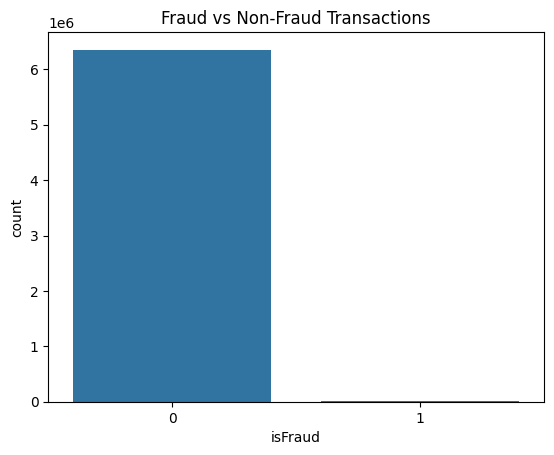

In [6]:
# Visualizing Class Distribution
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

In [7]:
# Encoding categorical features
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [8]:
# Splitting data into features and target
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])  # Removing IDs
y = df['isFraud']

In [9]:
# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [10]:
# CatBoost Model Training
model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=200)
model.fit(X_train, y_train)


0:	learn: 0.3493938	total: 369ms	remaining: 3m 3s
200:	learn: 0.0009602	total: 41.3s	remaining: 1m 1s
400:	learn: 0.0007292	total: 1m 20s	remaining: 19.8s
499:	learn: 0.0006739	total: 1m 39s	remaining: 0us


In [11]:
# Predictions
y_pred = model.predict(X_test)

In [13]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9997650339011288
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.84      0.90      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.92      0.95   1272524
weighted avg       1.00      1.00      1.00   1272524



In [17]:
import joblib
joblib.dump(model, 'catboost_model.pkl') 

['catboost_model.pkl']